<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/FBTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis and Forecasting: Economic and Financial Data

In [4]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [7]:
plt.style.use('fivethirtyeight')

In [8]:
# Identify stock and data range

XOM = yf.download('XOM', start='2010-01-01', end='2023-06-23')

[*********************100%***********************]  1 of 1 completed


In [9]:
# Show the top rows of the data

print(XOM.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  68.720001  69.260002  68.190002  69.150002  41.319065  27809100
2010-01-05  69.190002  69.449997  68.800003  69.419998  41.480385  30174700
2010-01-06  69.449997  70.599998  69.339996  70.019997  41.838913  35044700
2010-01-07  69.900002  70.059998  69.419998  69.800003  41.707458  27192100
2010-01-08  69.690002  69.750000  69.220001  69.519997  41.540154  24891800


In [10]:
# Statistical summary

print(XOM.describe())

              Open         High          Low        Close    Adj Close  \
count  3390.000000  3390.000000  3390.000000  3390.000000  3390.000000   
mean     79.354767    80.032227    78.671625    79.376088    59.447390   
std      16.095783    16.154592    16.059577    16.128744    15.896524   
min      31.410000    32.380001    30.110001    31.450001    26.335979   
25%      70.899998    71.662502    70.249998    71.139999    52.220148   
50%      82.045002    82.610001    81.489998    82.059998    58.429947   
75%      88.589996    89.180000    88.002502    88.629997    63.074323   
max     117.720001   119.919998   116.830002   119.169998   117.321945   

             Volume  
count  3.390000e+03  
mean   1.754119e+07  
std    9.535058e+06  
min    3.851300e+06  
25%    1.094182e+07  
50%    1.489665e+07  
75%    2.125560e+07  
max    1.180235e+08  


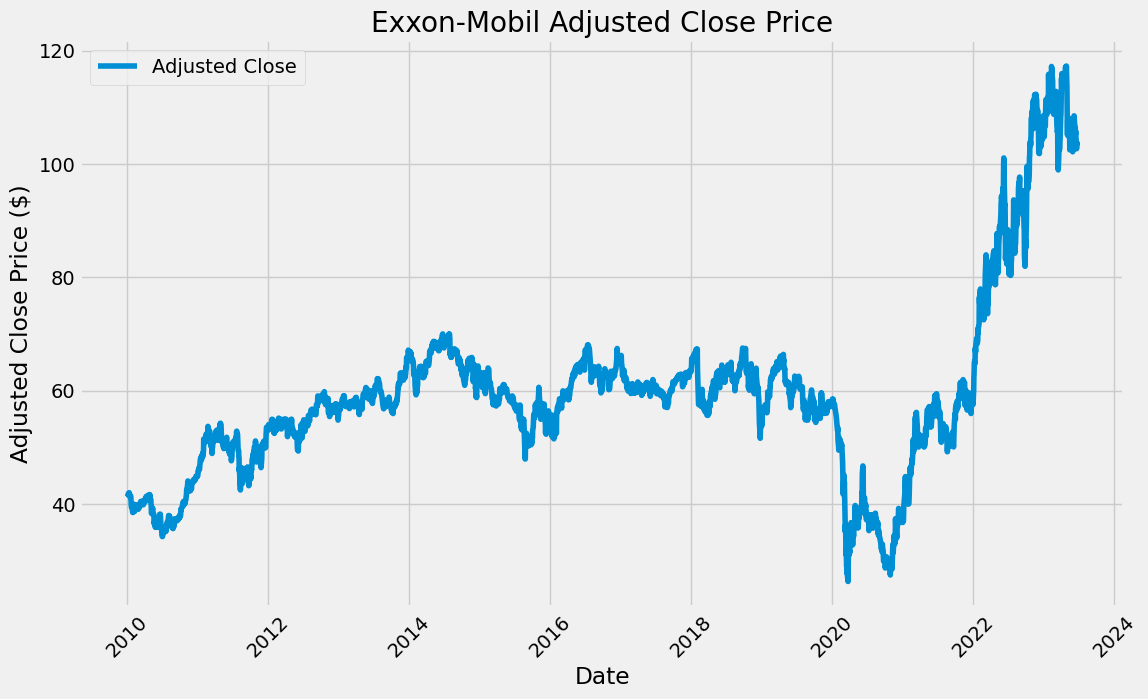

In [12]:
# Graph the data

plt.figure(figsize=(12,7))
plt.plot(XOM['Adj Close'], label='Adjusted Close')
plt.title('Exxon-Mobil Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

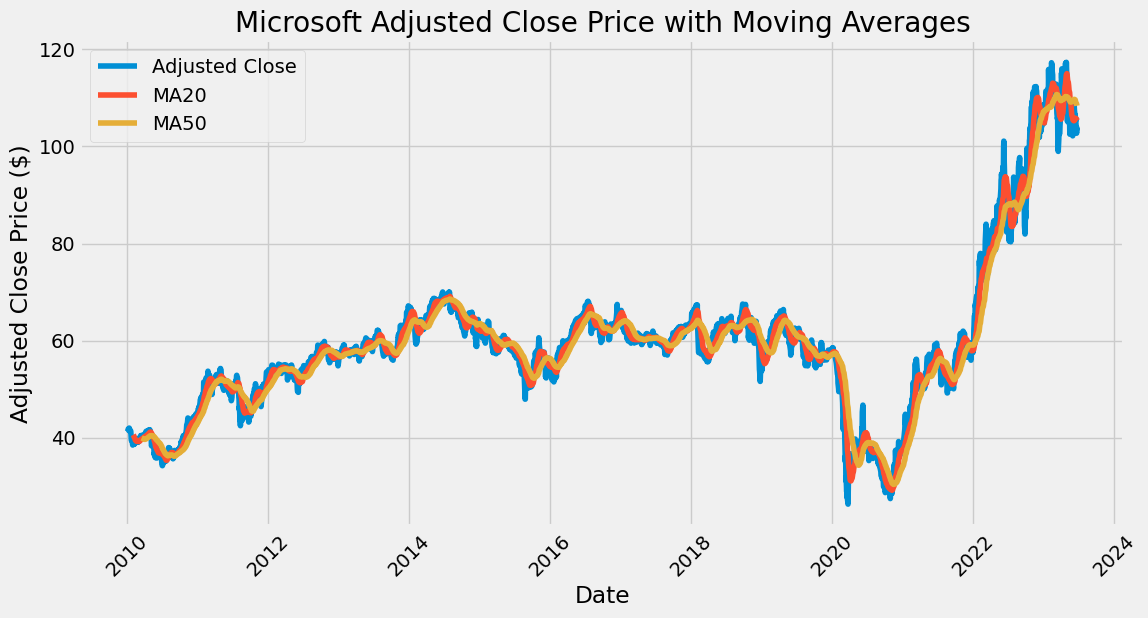

In [13]:
# Compute the short-term moving average 'MA20'
XOM['MA20'] = XOM['Adj Close'].rolling(window=20).mean()

# Compute the long-term moving average 'MA50'
XOM['MA50'] = XOM['Adj Close'].rolling(window=50).mean()

# Plot Microsoft's adjusted close price and moving averages.
plt.figure(figsize=(12,6))
plt.plot(XOM['Adj Close'], label='Adjusted Close')
plt.plot(XOM['MA20'], label='MA20')
plt.plot(XOM['MA50'], label='MA50')

plt.title('Microsoft Adjusted Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


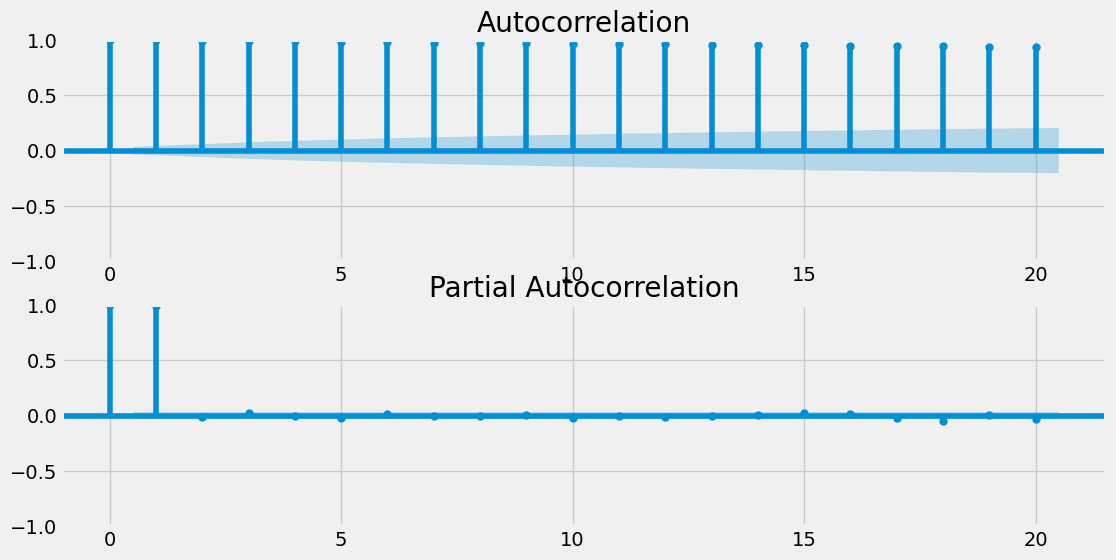

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation and partial autocorrelation functions
fig, ax = plt.subplots(2, figsize=(12,6))
plot_acf(XOM['Adj Close'], lags=20, ax=ax[0])
plot_pacf(XOM['Adj Close'], lags=20, ax=ax[1])
plt.show()

In [16]:
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# Create a new DataFrame
data = XOM.loc[:, ['Adj Close']]
data.head()

,Adj Close
Date,
2010-01-04,41.319065
2010-01-05,41.480385
2010-01-06,41.838913
2010-01-07,41.707458
2010-01-08,41.540154


In [18]:
# Rename the column to suit the Prophet's naming convention
data = data.reset_index()
data = data.rename(columns={'Date':'ds', 'Adj Close':'y'})
data.head()

,ds,y
0,2010-01-04,41.319065
1,2010-01-05,41.480385
2,2010-01-06,41.838913
3,2010-01-07,41.707458
4,2010-01-08,41.540154


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_iyecg8r/uvdxfyi6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_iyecg8r/eysjbfqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12911', 'data', 'file=/tmp/tmp_iyecg8r/uvdxfyi6.json', 'init=/tmp/tmp_iyecg8r/eysjbfqp.json', 'output', 'file=/tmp/tmp_iyecg8r/prophet_modelueqwtn1l/prophet_model-20230624220142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


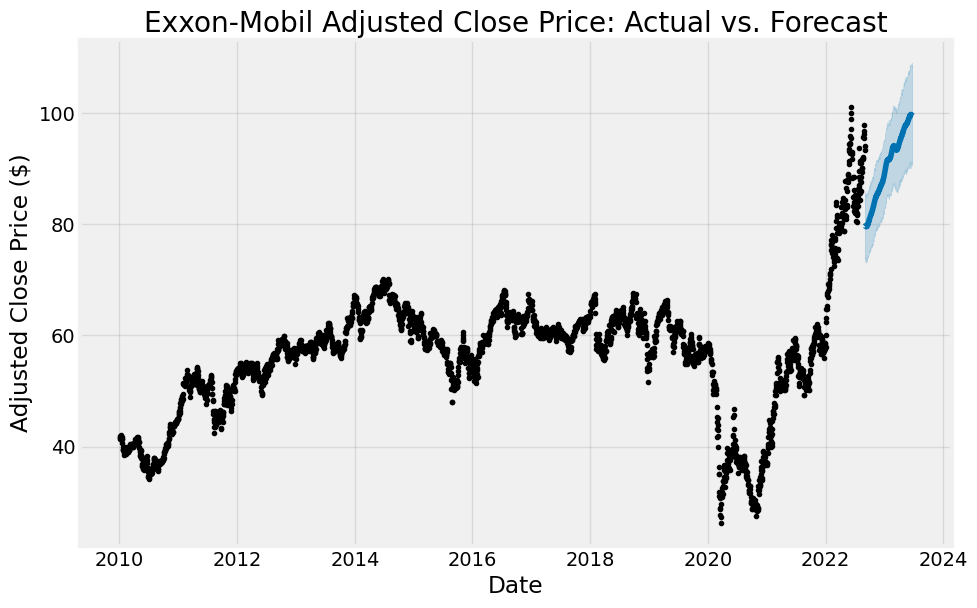

In [25]:
train_data = data[data['ds'] < '2022-09-01']
test_data = data[data['ds'] >= '2022-09-01']

# Create model and fit on training data
model = Prophet()
model.fit(train_data)

# Define a new DataFrame aligned with the forecast horizon
future = test_data[['ds']]
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Exxon-Mobil Adjusted Close Price: Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.show()